In [21]:
import numpy as np
import cv2
import re
import imageio

## Visualization

Before diving into algorithms, visualize the stereo image pairs using tools like OpenCV or matplotlib in Python. This will give you a sense of the scene and disparities.
Display the ground truth disparity maps alongside the images to understand the depth information

In [16]:
DISP_0 = "/home/hedwig/heetez/learning/3dcomputer_vision/visual_odo/roadmap/foundation/assets/stereo_data/artroom1/disp0.pfm"
DISP_1 = "/home/hedwig/heetez/learning/3dcomputer_vision/visual_odo/roadmap/foundation/assets/stereo_data/artroom1/disp1.pfm"

In [25]:
## THANKS TO CHATGPT

def load_pfm(file_path):
    with open(file_path, 'rb') as file:
        # Read header
        color = None
        width = None
        height = None
        scale = None
        endian = None

        header = file.readline().rstrip()
        if header == b'PF':
            color = True
        elif header == b'Pf':
            color = False
        else:
            raise Exception('Not a PFM file.')

        dim_match = re.match(r'^(\d+)\s(\d+)\s$', file.readline().decode('utf-8'))
        if dim_match:
            width, height = map(int, dim_match.groups())
        else:
            raise Exception('Malformed PFM header.')

        scale = float(file.readline().rstrip())
        if scale < 0:  # little-endian
            endian = '<'
            scale = -scale
        else:
            endian = '>'  # big-endian

        data = np.fromfile(file, endian + 'f')
        shape = (height, width, 3) if color else (height, width)

        return np.reshape(data, shape), scale

# Example usage
image, scale = load_pfm(DISP_0)
print(image.shape)
print(scale)

(1080, 1920)
0.003922


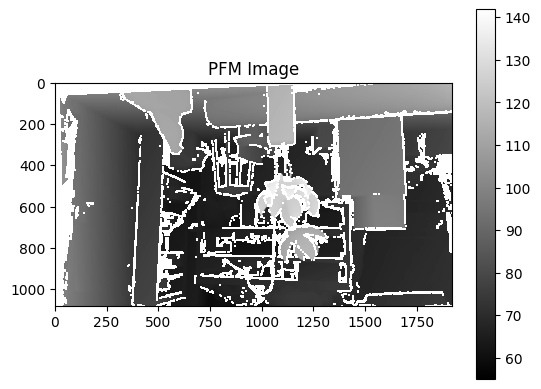

In [27]:
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')  # Use cmap='gray' if it's a grayscale image
plt.colorbar()
plt.title('PFM Image')
plt.show()